# Visualize Time-Series Data

In this exercise, you will visualize electricity usage (load) patterns over time using the buildings900ktest dataset from the BuildingsBench benchmark suite. This task introduces an important phase of machine learning model development, exploratory data analysis (EDA), and helps you become familiar with time series data. You will also learn to use the matplotlib module, a widely used Python library for data visualization, to generate plots.

In the Explore Datasets section, you will examine the basic features of the dataset, including its type, size, and structure. Understanding these aspects is essential, as they form the foundation for writing code to analyze the data.

In the Visualize Dataset section, I recommend reading through the comments carefully to understand the code. You will be modifying and expanding this code to complete the remaining exercises in the tutorial. Familiarity with matplotlib functions will be especially important, as you will use this library to create plots for your final project.

In [1]:
# os to set environment variables
# warnings to filter out specific warnings
from os import environ
from warnings import filterwarnings

# numpy for array manipulations
# matplotlib.pyplot for generating plots
from numpy import concatenate, datetime64, timedelta64
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, xticks, yticks, gcf, title, tight_layout, grid

# buildings_bench for loading datasets and data transformations
from buildings_bench.transforms import TimestampTransform
from buildings_bench import load_torch_dataset,  benchmark_registry

# Silence FutureWarning messages
filterwarnings("ignore", category=FutureWarning)

# Sets an environment variable indicating the path to the dataset
environ["BUILDINGS_BENCH"] = "/pscratch/sd/n/nrushad/Dataset/" # <update>

## Explore Dataset

In [2]:
# Loads the dataset using a built-in function from the BuildingsBench library
dataset = load_torch_dataset('buildings-900k-test')

# Retrieves the .building_datasets attribute
dataset = dataset.building_datasets

In [3]:
# Prints the type of the dataset object.
print('Dataset Type: ', type(dataset))

# Prints the number of PUMA regions included in the data
print('Dataset Length: ', len(dataset))

Dataset Type:  <class 'dict'>
Dataset Length:  1480


In [5]:
# You noticed that the dataset type is dict, which refers to a dictionary in Python. A dictionary is an unordered collection of key-value pairs that allows you
# to store and retrieve data efficiently using unique keys.

import random

# Generate 15 random indices between 1 and 1480 (inclusive)
rand_num = [random.randint(1, 1480) for _ in range(15)]
rand_num.sort()

# Convert keys to a list
keys_list = list(dataset.keys())

# Get the values at the random indices
selected_keys = [keys_list[i] for i in rand_num]

# Print the random indices and the corresponding keys
print("Random indices:", rand_num)
print("Selected keys:", selected_keys)

Random indices: [63, 74, 74, 220, 466, 530, 630, 761, 807, 835, 1057, 1268, 1280, 1303, 1359]
Selected keys: ['commercial_puma=G51059305/257539', 'commercial_puma=G51059305/307597', 'commercial_puma=G51059305/307597', 'commercial_puma=G27002300/163223', 'commercial_puma=G42000900/222676', 'commercial_puma=G42000900/301483', 'residential_puma=G51059305/166041', 'residential_puma=G06000702/31128', 'residential_puma=G06000702/168498', 'residential_puma=G06000702/239788', 'residential_puma=G27002300/239152', 'residential_puma=G42000900/139077', 'residential_puma=G42000900/154941', 'residential_puma=G42000900/199222', 'residential_puma=G42000900/306953']


## Visualize Dataset

The `DataVisualization` class extracts load and timestamp information for a selected `PUMA ID`, converts the time features into a readable datetime format, and plots the load over time. PUMA stands for Public Use Microdata Area, which is used to identify geographical regions. For more information about `PUMA IDs`, please refer to the following document: `https://www.census.gov/programs-surveys/geography/guidance/geo-areas/pumas.html`.

__Acknowldgement__: The code is adapted from the BuildingsBench tutorial and formatted to fit this exercise. The original code can be found here: `https://github.com/NREL/BuildingsBench/blob/main/tutorials/dataset_quick_start.ipynb`

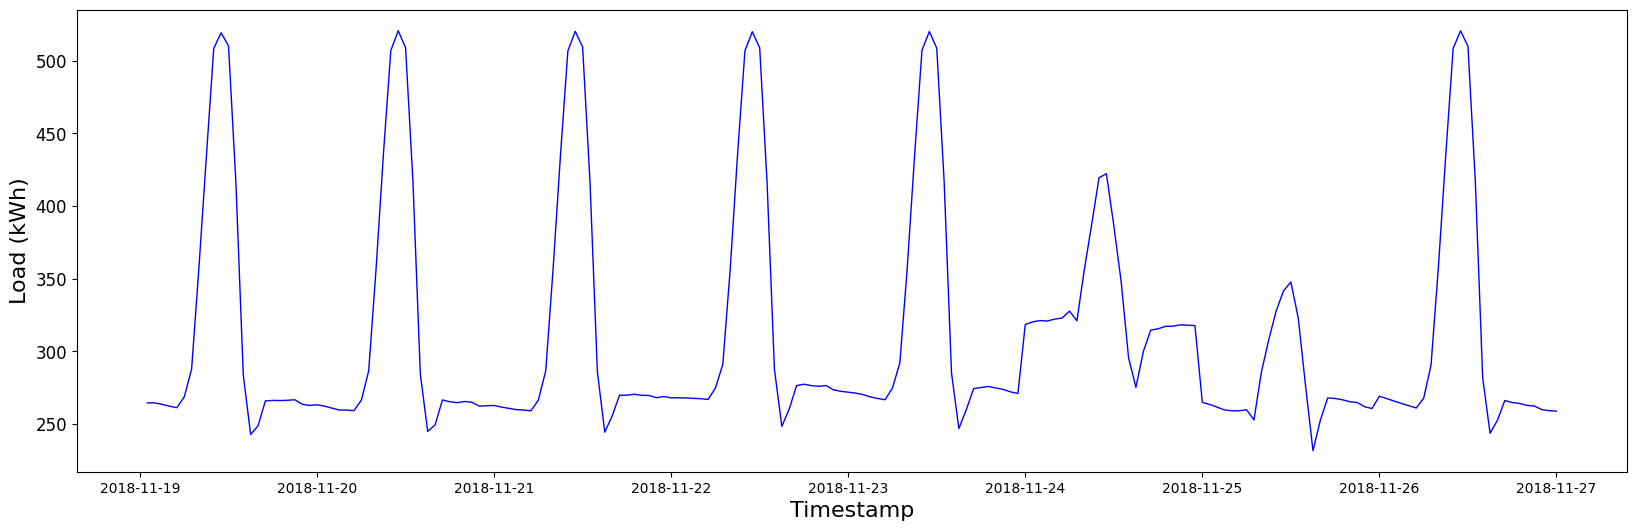

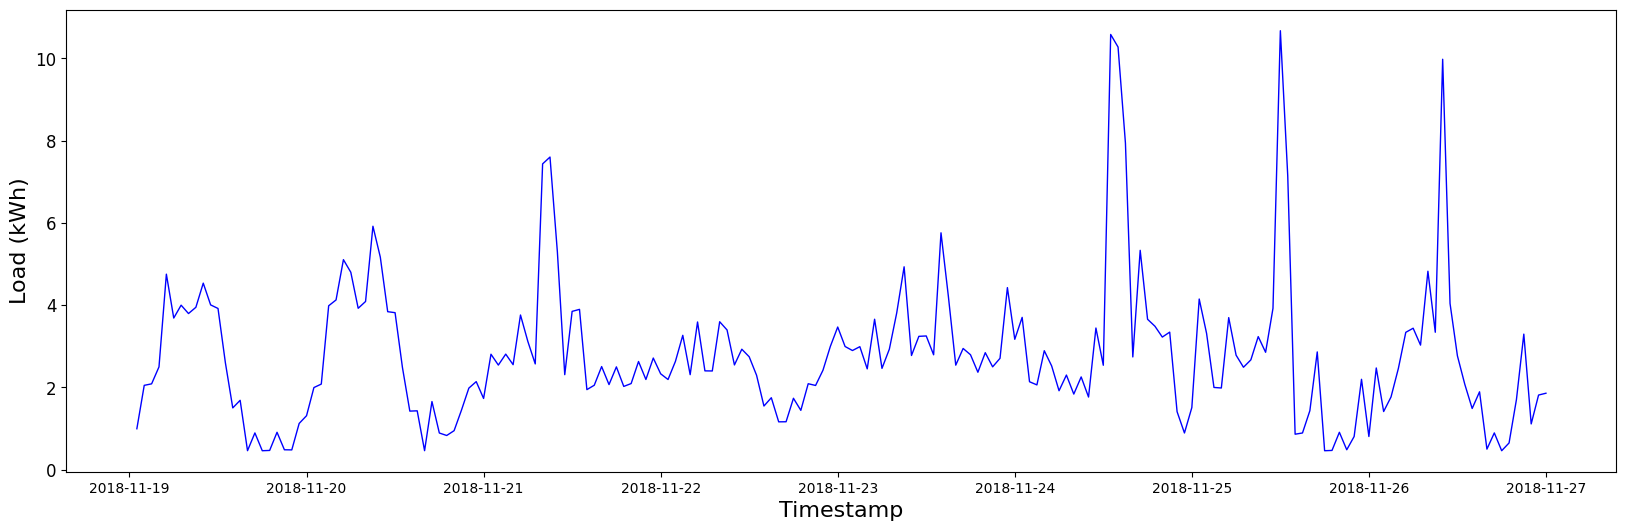

In [24]:
# Define a class for visualizing load time-series
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        # Get one building entry from specified PUMA and index
        self.dataset = dataset[puma_id][idx]
  
    def load(self):
        # Return load (energy usage) values
        return self.dataset['load']

    def dt(self):
        # Convert time features to datetime
        timestamp_transform = TimestampTransform()
        timestamp = concatenate([
            self.dataset['day_of_year'],       # Day index (1–365)
            self.dataset['day_of_week'],       # Weekday (0–6)
            self.dataset['hour_of_day']], -1)  # Hour (0–23)

        # Restore to full timestamp
        timestamp = timestamp_transform.undo_transform(timestamp)

        # Compute datetime from start date
        dt = datetime64('2018-01-01') + timedelta64(1, 'D') * (timestamp[..., 0] - 1) + timedelta64(1, 'h') * timestamp[..., -1]
        
        # datetime64('2018-01-01'): Base date we start counting from
        
        # timestamp[..., 0]: Day of the year (1 to 365)
        # (timestamp[..., 0] - 1): Subtract 1 so that Jan 1 maps to 0 days
        
        # timedelta64(1, 'D') * (timestamp[..., 0] - 1): Calculates how many full days to add to the base date
        # timestamp[..., -1]: Hour of the day (0 to 23)
        # timedelta64(1, 'h') * timestamp[..., -1]: Calculates how many hours to add

        return dt

    def plot_load(self, dt, load, figsize=(20,6)):
        figure(figsize=figsize)               # Establish a figure and its size
        # Plot load vs. time with blue line and width 1
        plot(dt.reshape(-1), load.reshape(-1), color='blue', linewidth=1)
        ylabel('Load (kWh)', fontsize=16)     # Y-axis label
        xlabel('Timestamp', fontsize=16)      # X-axis label
        yticks(fontsize=12)                   # Y-axis ticks
        xticks(fontsize=10)                   # X-axis ticks
        show()                                # Display plot

    def visualize(self):
        # Retrieve datetime and load, then plot them
        dt = self.dt()
        load = self.load()
        self.plot_load(dt, load)

if __name__ == "__main__":
    idx = 322
    # Select day index

    # Visualize commercial building
    x = DataVisualization(dataset=dataset, puma_id='commercial_puma=G42000900/3960', idx=idx)
    x.visualize()

    # Visualize residential building
    x = DataVisualization(dataset=dataset, puma_id='residential_puma=G06000702/233130', idx=idx)
    x.visualize()

### Exercise 1

Your task is to visualize the energy load patterns for at least three `commercial` and three `residential` `PUMA IDs`. By changing the `PUMA IDs` while keeping the index (`idx = 0`) fixed, you can analyze how load patterns vary across different buildings. You are encouraged to use the example `PUMA IDs` provided or explore additional ones by printing the dataset keys.

Commercial: 
- `commercial_puma=G42000900/4459` 
- `commercial_puma=G51059305/257539` 
- `commercial_puma=G27002300/163223`

Residential: 
- `residential_puma=G42000900/5052` 
- `residential_puma=G27002300/239152` 
- `residential_puma=G06000702/168498`

In [7]:
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        self.dataset = dataset[puma_id][idx]
  
    def load(self):
        return self.dataset['load']

    def dt(self):
        timestamp_transform = TimestampTransform()
        timestamp = concatenate([
            self.dataset['day_of_year'],    
            self.dataset['day_of_week'],
            self.dataset['hour_of_day']], -1)
        timestamp = timestamp_transform.undo_transform(timestamp)
        dt = datetime64(f'2018-01-01') + timedelta64(1, 'D') * (timestamp[...,0]-1) + timedelta64(1, 'h') * timestamp[...,-1]
        return dt

    def plot_load(self, dt, load, figsize=(20,6)):
        figure(figsize=figsize)
        plot(dt.reshape(-1), load.reshape(-1), color='blue', linewidth=1)
        ylabel('Load (kWh)', fontsize=16)
        xlabel('Timestamp', fontsize=16)
        yticks(fontsize=12)
        xticks(fontsize=10)
        show()

    def visualize(self):
        dt = self.dt()
        load = self.load()
        self.plot_load(dt, load)
        
if __name__ == "__main__":
    # TODO:
    # Visualize the load data for idx = 0, 100, and 200 using three PUMA IDs.
    # You may use the three example PUMA IDs provided, or explore others of your choice.

### Excersice 2

This exercise is similar to `Exercise 1`. However, instead of changing the `PUMA IDs`, you will vary the index value (`idx`). Select one residential and one commercial `PUMA ID` from those used in `Exercise 1`. Each index corresponds to a specific day of the year (ranging from `0` to `364`). By selecting three different index values for each `PUMA ID`, you can observe how load patterns fluctuate over the course of a year at a single location.

In [ ]:
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        self.dataset = dataset[puma_id][idx]
  
    def load(self):
        return self.dataset['load']

    def dt(self):
        timestamp_transform = TimestampTransform()
        timestamp = concatenate([
            self.dataset['day_of_year'],    
            self.dataset['day_of_week'],
            self.dataset['hour_of_day']], -1)
        timestamp = timestamp_transform.undo_transform(timestamp)
        dt = datetime64(f'2018-01-01') + timedelta64(1, 'D') * (timestamp[...,0]-1) + timedelta64(1, 'h') * timestamp[...,-1]
        return dt

    def plot_load(self, dt, load, figsize=(20,6)):
        figure(figsize=figsize)
        plot(dt.reshape(-1), load.reshape(-1), color='blue', linewidth=1)
        ylabel('Load (kWh)', fontsize=16)
        xlabel('Timestamp', fontsize=16)
        yticks(fontsize=12)
        xticks(fontsize=10)
        show()

    def visualize(self):
        dt = self.dt()
        load = self.load()
        self.plot_load(dt, load)
        
if __name__ == "__main__":
    # TODO:
    # Select one commercial and one residential PUMA ID used in Exercise 1
    # Visualize the load data for three different index values within the range [0, 364]

### Excersice 3

In this exercise, instead of visualizing the load on regular days, you will use the same `residential` and `commercial` `PUMA IDs` from `Exercise 2` and select specific index values (`idx`) to observe patterns on U.S. holidays. Use the following index values to visualize the energy load on:

1) Martin Luther King Jr. Day → `idx = 14`
2) Presidents Day → `idx = 48`
3) Memorial Day → `idx = 141`

Then, identify an appropriate idx for each of the following two holidays and visualize the load patterns:

1) Independence Day → choose an `idx` in the range `[175, 185]`
2) Labor Day → choose an `idx` in the range `[235, 245]`

In [ ]:
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        self.dataset = dataset[puma_id][idx]
  
    def load(self):
        return self.dataset['load']

    def dt(self):
        timestamp_transform = TimestampTransform()
        timestamp = concatenate([
            self.dataset['day_of_year'],    
            self.dataset['day_of_week'],
            self.dataset['hour_of_day']], -1)
        timestamp = timestamp_transform.undo_transform(timestamp)
        dt = datetime64(f'2018-01-01') + timedelta64(1, 'D') * (timestamp[...,0]-1) + timedelta64(1, 'h') * timestamp[...,-1]
        return dt

    def plot_load(self, dt, load, figsize=(20,6)):
        figure(figsize=figsize)
        plot(dt.reshape(-1), load.reshape(-1), color='blue', linewidth=1)
        ylabel('Load (kWh)', fontsize=16)
        xlabel('Timestamp', fontsize=16)
        yticks(fontsize=12)
        xticks(fontsize=10)
        show()

    def visualize(self):
        dt = self.dt()
        load = self.load()
        self.plot_load(dt, load)
        
if __name__ == "__main__":
    # TODO:
    # Create an instance of the DataVisualization class.
    
    # TODO:
    # For the PUMA IDs identified in Exercise 2, visualize the load data for the following holidays:
    # - Martin Luther King Jr. Day (MLK Day): idx = 14
    # - Presidents Day: idx = 48
    # - Memorial Day: idx = 141

    # TODO:
    # Identify the index values (idx) for the following holidays:
    # - Independence Day (within the range [175, 185])
    # - Labor Day (within the range [235, 245])
    # Once identified, visualize the load data for both holidays using the PUMA IDs selected in Exercise 2.

### Excersice 4

In this exercise, you will generate visualizations of time-series load data across multiple time scales. Your task is to complete the methods and generate plots for:

- The entire year
- A selected month
- A specific day

Each method should extract the relevant time range from the dataset and use the corresponding timestamps and load values to generate a plot. Use formatted strings such as `2018-{month:02d}` or `2018-{month:02d}-{day:02d}` to filter the data by month or day.

In [ ]:
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        self.dataset = dataset[puma_id].df

    def plot_load(self, timestamp, load, figsize=(20,6)):
        figure(figsize=figsize)
        # TODO:
        # Implement the plot function using timestamp and load
        ylabel('Load (kWh)', fontsize=16)
        xlabel('Timestamp', fontsize=16)
        yticks(fontsize=12)
        xticks(fontsize=10)
        show()

    def year_plot(self, figsize=(20,6)):
        timestamp = self.dataset['power'].index  
        load = self.dataset['power'].values
        # TODO:
        # Use the plot_load method to visualize the entire year's data
    
    def month_plot(self, month, figsize=(20,6)):
        timestamp = self.dataset['power'][f'2018-{month:02d}'].index
        # TODO:
        # Initialize the corresponding load values for the selected month
        # Use the plot_load method to visualize the selected month's data

    def day_plot(self, day, month, figsize=(20,6)):
        # TODO:
        # Filter and initialize both timestamp and load for the given day and month
        # Use {day:02d} and {month:02d} to format the date string correctly
        # Use the plot_load method to visualize the selected day's data

if __name__ == "__main__":
    # TODO:
    # Create an instance of the DataVisualization class
    # Call year_plot, month_plot, and day_plot methods to visualize respective data